In [1]:
import pandas as pd

TrainData = pd.read_csv("train.csv")
TrainData

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))

print(stop)

{'he', 'is', 's', 'the', 'if', 'we', "she's", 'haven', 'hadn', 'before', 'your', "mightn't", 'didn', "it's", 'these', 'isn', 'o', 'am', "should've", 'them', 'this', 'have', 'my', 'are', "couldn't", 'above', 'who', 'not', 'for', 'doesn', 'by', 'under', 'where', 'its', "you'd", 'to', 'on', 'again', "needn't", 'don', 'should', 'at', 'during', "don't", 'just', 'both', 'those', 'they', 'weren', 'i', 'until', 'so', 'needn', 'once', 'ourselves', 'such', 'after', "didn't", 'hasn', "hasn't", 'theirs', 'be', 'but', 'same', 'mightn', 'was', 'our', 'up', 'when', 'yourself', 'with', 'yourselves', 'you', 'it', "that'll", "doesn't", 'than', 'mustn', 'having', 'been', 'whom', 'few', 'here', 'shan', 'into', 'now', 'ours', 'more', 'from', 'in', 'did', 'too', 'myself', 'some', 'yours', "weren't", 'down', 'd', 'ain', 'being', 'all', 'has', 'about', 've', 'themselves', 'why', 'him', 'that', 'herself', 'm', 'couldn', "wasn't", 'most', 'himself', 'ma', 'will', 'and', 'there', "isn't", 'below', 'other', 'as',

In [ ]:
def create_corpus(target):
    corpus=[]
    
    for x in TrainData[TrainData['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus(0)
corpus

["What's",
 'up',
 'man?',
 'I',
 'love',
 'fruits',
 'Summer',
 'is',
 'lovely',
 'My',
 'car',
 'is',
 'so',
 'fast',
 'What',
 'a',
 'goooooooaaaaaal!!!!!!',
 'this',
 'is',
 'ridiculous....',
 'London',
 'is',
 'cool',
 ';)',
 'Love',
 'skiing',
 'What',
 'a',
 'wonderful',
 'day!',
 'LOOOOOOL',
 'No',
 'way...I',
 "can't",
 'eat',
 'that',
 'shit',
 'Was',
 'in',
 'NYC',
 'last',
 'week!',
 'Love',
 'my',
 'girlfriend',
 'Cooool',
 ':)',
 'Do',
 'you',
 'like',
 'pasta?',
 'The',
 'end!',
 'We',
 'always',
 'try',
 'to',
 'bring',
 'the',
 'heavy.',
 '#metal',
 '#RT',
 'http://t.co/YAo1e0xngw',
 'Crying',
 'out',
 'for',
 'more!',
 'Set',
 'me',
 'ablaze',
 'On',
 'plus',
 'side',
 'LOOK',
 'AT',
 'THE',
 'SKY',
 'LAST',
 'NIGHT',
 'IT',
 'WAS',
 'ABLAZE',
 'http://t.co/qqsmshaJ3N',
 '@PhDSquares',
 '#mufc',
 "they've",
 'built',
 'so',
 'much',
 'hype',
 'around',
 'new',
 'acquisitions',
 'but',
 'I',
 'doubt',
 'they',
 'will',
 'set',
 'the',
 'EPL',
 'ablaze',
 'this',
 'seas

<BarContainer object of 20 artists>

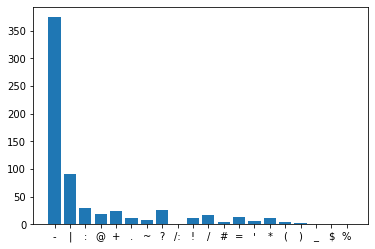

In [ ]:
import string
special = string.punctuation

#%%
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

dic=defaultdict(int)
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y)


In [ ]:
df=TrainData
df.shape


(7613, 5)

In [ ]:
import re
example="New competition launched :https://www.kaggle.com/c/nlp-getting-started"
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub('',text)

print(remove_URL(example))

df['text']=df['text'].apply(lambda x : remove_URL(x))

New competition launched :


In [ ]:
example = """<div>
<h1>Real or Fake</h1>
<p>Kaggle </p>
<a href="https://www.kaggle.com/c/nlp-getting-started">getting started</a>
</div>"""
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

print(remove_html(example))

df['text']=df['text'].apply(lambda x: remove_html(x))


Real or Fake
Kaggle 
getting started



In [ ]:
example="I am a #king"
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

print(remove_punct(example))

df['text']=df['text'].apply(lambda x : remove_punct(x))

I am a king


In [ ]:
pip install pyspellchecker

     |████████████████████████████████| 1.9MB 2.5MB/s 


In [ ]:
## Spelling Correction

from spellchecker import SpellChecker
from tqdm import tqdm

spell = SpellChecker()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# Spell Correction, Lemmatization and Create corpus of Words

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import json

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def create_corpus(df):
    wordnet_lemmatizer = WordNetLemmatizer()
    corpus=[]
    for tweet in tqdm(df['text']):
        #print(tweet)
        misspelled_words = spell.unknown(tweet.split())
        corrected_text = [spell.correction(word) if word in misspelled_words else word for word in word_tokenize(tweet.lower())]
        #print(corrected_text)
        tagged = nltk.pos_tag(corrected_text)
        wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), tagged)
        lemt_word = [word if tag is None else wordnet_lemmatizer.lemmatize(word, tag) for word, tag in wordnet_tagged]
        #print(lemt_word)
        words = [word for word in corrected_text if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
        #print(words)
    return corpus

In [ ]:
corpus=create_corpus(df)